<a href="https://colab.research.google.com/github/tamer017/ML-Assessments/blob/master/Gaussian_Mixture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian Mixture

Running this project require the following imports 

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
from scipy.spatial.distance import cdist
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
from sklearn.preprocessing import StandardScaler,MaxAbsScaler,MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from scipy.stats import normaltest, zscore
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
from operator import itemgetter
%matplotlib inline

In [ ]:

plt.figure(figsize=(16,8))
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X, method = [], num_clusters = 0,kmean = False):
    # color = ["blue","orange","green","red","purple","brown","pink","gray","olive","cyan","yellow","black","lime","magenta"]  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
      sns.scatterplot(X[:, 0], X[:, 1], hue=np.zeros((X.shape[0],)), legend='full',palette="Set1")  
    else:
      labels = method.labels_
      if (num_clusters > 45):
        sns.scatterplot(X[:, 0], X[:, 1], hue=labels,palette="Set1").legend_.remove() 
      else: 
        sns.scatterplot(X[:, 0], X[:, 1], hue=labels, legend='auto',palette="Set1")  
        # plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,ncol=3)
      if (kmean):
        for i in range(num_clusters):
            plt.scatter(method.cluster_centers_[i][0], method.cluster_centers_[i][1], c = "black", marker = 'x', s = 100)   
    plt.show()
  
          

<Figure size 1152x576 with 0 Axes>

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

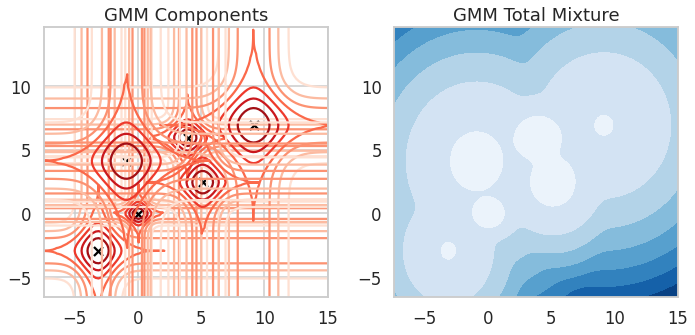

GaussianMixture(covariance_type='diag', n_components=6)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

# Generate some sample data
X = Multi_blob_Data

# Fit a Gaussian Mixture Model with 3 components and diagonal covariance
gmm = GaussianMixture(n_components=6, covariance_type='diag')
gmm.fit(X)

# Generate grid points for plotting
x = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100)
y = np.linspace(X[:,1].min()-1, X[:,1].max()+1, 100)
X_grid, Y_grid = np.meshgrid(x, y)
XY = np.column_stack([X_grid.ravel(), Y_grid.ravel()])

# Evaluate the GMM at the grid points
Z = gmm.score_samples(XY)
Z = Z.reshape(X_grid.shape)

# Plot the GMM components and total mixture as 2D contour plots
plt.figure(figsize=(10, 5))
plt.subplot(121)
for i in range(gmm.n_components):
    mu, sigma = gmm.means_[i], np.sqrt(gmm.covariances_[i])
    plt.contour(x, y, np.exp(-0.5 * ((XY - mu) / sigma)**2).sum(axis=1).reshape(X_grid.shape), cmap=plt.cm.Reds)
    plt.scatter(mu[0], mu[1], marker='x', color='black')
plt.title('GMM Components')

plt.subplot(122)
plt.contourf(X_grid, Y_grid, Z, cmap=plt.cm.Blues_r)
plt.title('GMM Total Mixture')

plt.tight_layout()
plt.show()
gmm


In [ ]:
labels = gmm.precisions_.max(axis=0)
# color = ["blue","orange","green","red","purple","brown","pink","gray","olive","cyan","yellow","black","lime","magenta"]  #List colors
# alpha = 0.5  #color obaque
# s = 20
# if num_clusters == 0:
#   sns.scatterplot(X[:, 0], X[:, 1], hue=np.zeros((X.shape[0],)), legend='full',palette="Set1")  
# else:
#   labels = method.labels_
#   if (num_clusters > 45):
#     sns.scatterplot(X[:, 0], X[:, 1], hue=labels,palette="Set1").legend_.remove() 
#   else: 
sns.scatterplot(X[:, 0], X[:, 1], hue=labels, legend='auto',palette="Set1")  
# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,ncol=3)
  # if (kmean):
  #   for i in range(num_clusters):
  #       plt.scatter(method.cluster_centers_[i][0], method.cluster_centers_[i][1], c = "black", marker = 'x', s = 100)   
plt.show()

ValueError: ignored

In [ ]:
labels = gmm.sample
labels



<bound method BaseMixture.sample of GaussianMixture(covariance_type='diag', n_components=6)>

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



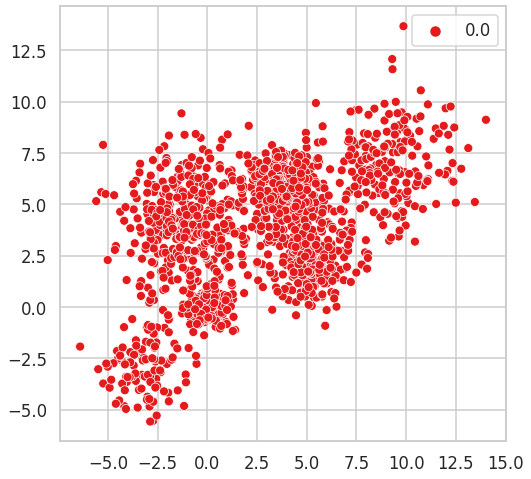

In [ ]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']
scaler = StandardScaler()

# Fit and transform the data using the scaler
scaled_data = scaler.fit_transform(iris_data.data)


For 2 clusters, the average silhouette_score is : 0.6810461692117462 , the destortion function is : 0.8555777695266533 ,and inertia is : 152.3479517603579
For 3 clusters, the average silhouette_score is : 0.5528190123564095 , the destortion function is : 0.6480304904934434 ,and inertia is : 78.851441426146
For 4 clusters, the average silhouette_score is : 0.49805050499728737 , the destortion function is : 0.5573847727333312 ,and inertia is : 57.22847321428572
For 5 clusters, the average silhouette_score is : 0.48874888709310566 , the destortion function is : 0.5096521951118286 ,and inertia is : 46.446182051282065
For 6 clusters, the average silhouette_score is : 0.36483400396700255 , the destortion function is : 0.4670733963396438 ,and inertia is : 39.03998724608726
For 7 clusters, the average silhouette_score is : 0.3462460703534074 , the destortion function is : 0.44282551880601356 ,and inertia is : 34.756749639249634
For 8 clusters, the average silhouette_score is : 0.34996644367986

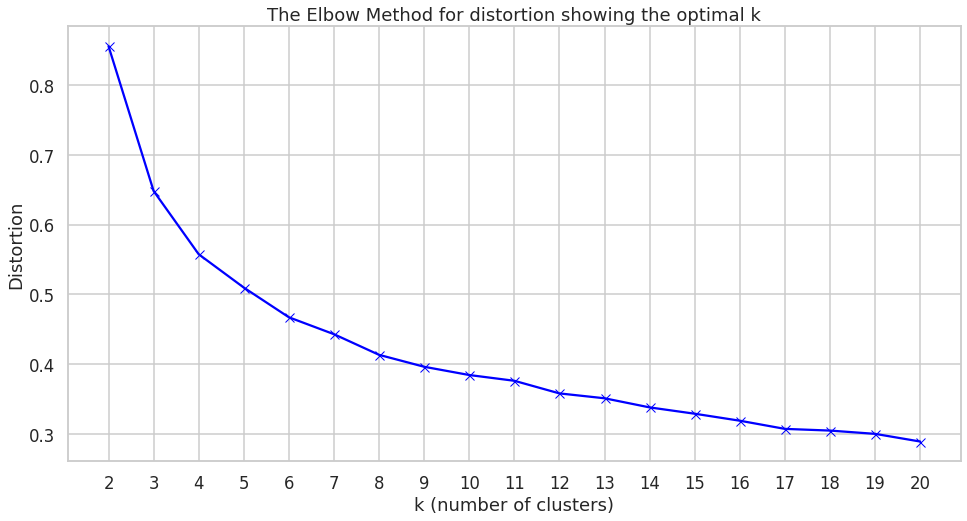

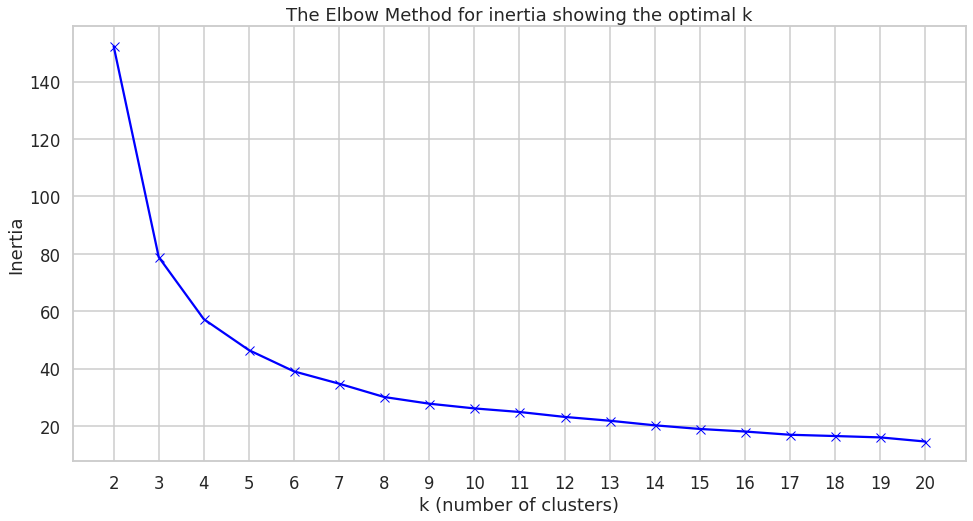

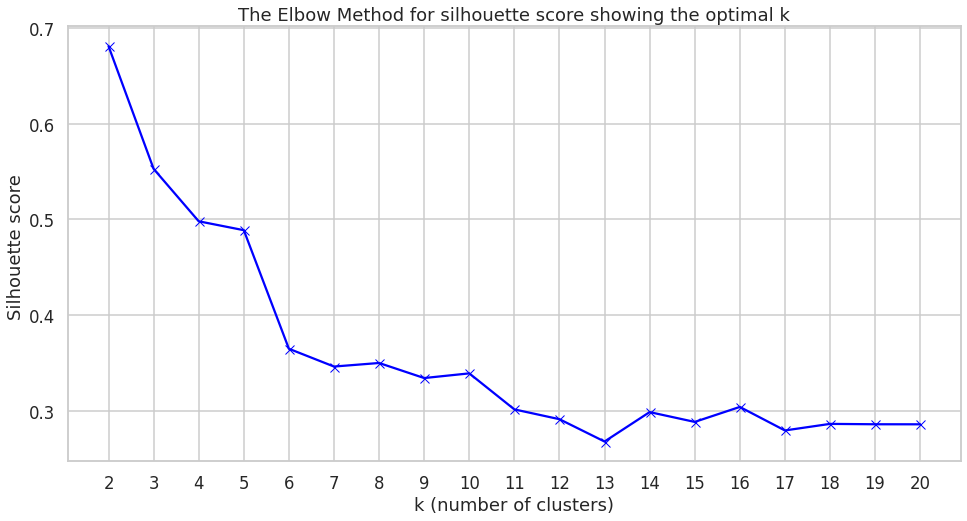

{'n_clusters': 2, 'silhouette_score': 0.6810461692117462}

In [ ]:
K_mean(iris_data.data) # 2

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 

In [ ]:
df = pd.read_csv("/content/Customer data.csv",index_col = "ID")
scaler = StandardScaler()

# Fit and transform the data using the scaler
scaled_data = scaler.fit_transform(df)

For 2 clusters, the average silhouette_score is : 0.24820216342164297 , the destortion function is : 2.173919581574484 ,and inertia is : 10514.621716046855
For 3 clusters, the average silhouette_score is : 0.27172237898695484 , the destortion function is : 1.963752256774182 ,and inertia is : 8630.902246481208
For 4 clusters, the average silhouette_score is : 0.26879180394522123 , the destortion function is : 1.7893352543407437 ,and inertia is : 7169.87082246584
For 5 clusters, the average silhouette_score is : 0.25424044566024484 , the destortion function is : 1.686482116497701 ,and inertia is : 6403.070166206631
For 6 clusters, the average silhouette_score is : 0.2630752333415311 , the destortion function is : 1.6230006073958654 ,and inertia is : 5830.9563029611545
For 7 clusters, the average silhouette_score is : 0.265325782477996 , the destortion function is : 1.5417434527530132 ,and inertia is : 5369.740062786457
For 8 clusters, the average silhouette_score is : 0.28688849154237095

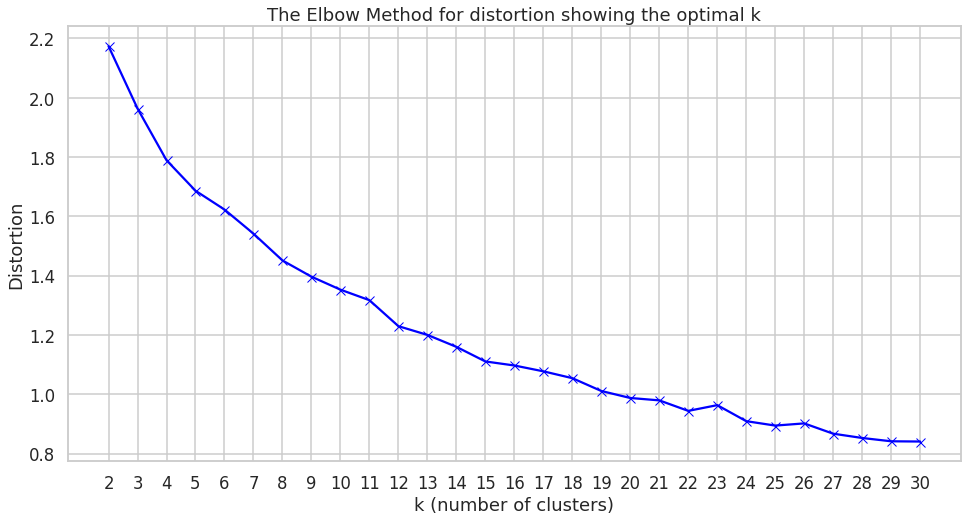

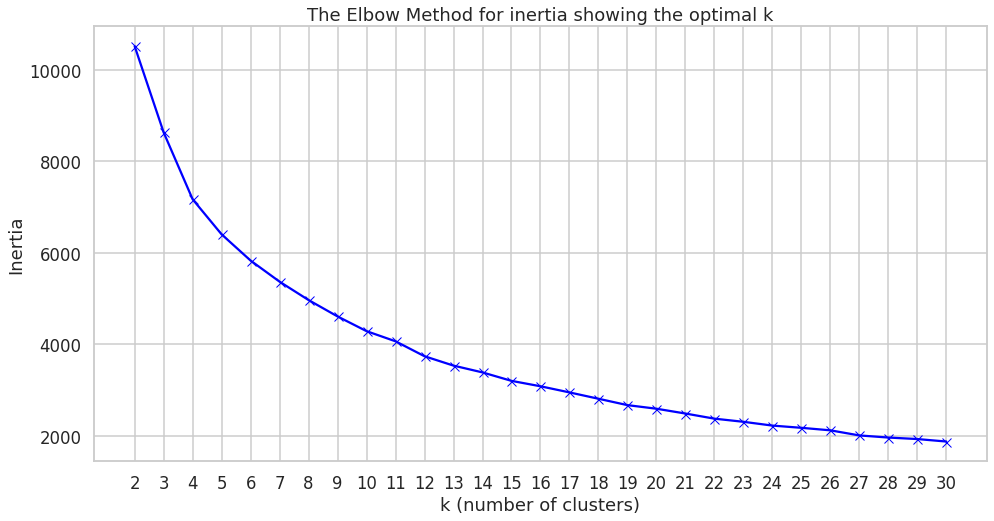

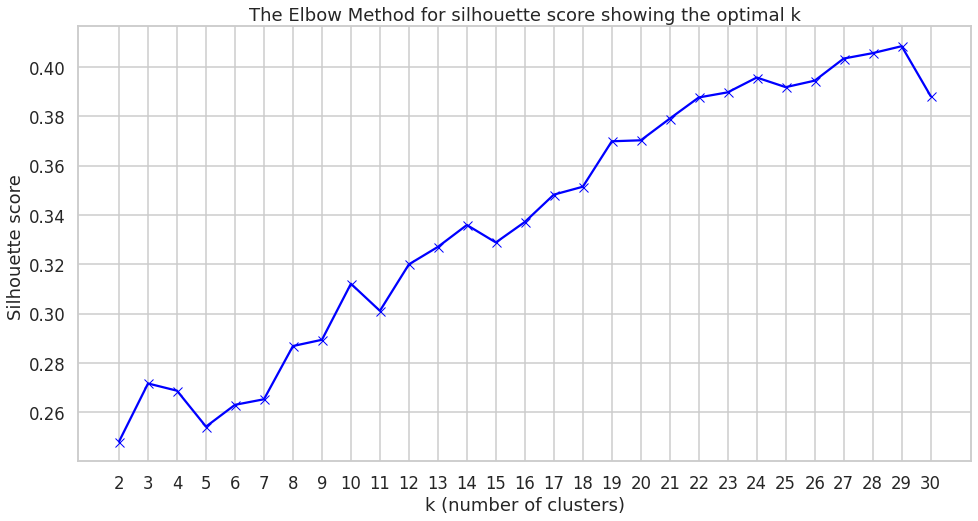

{'n_clusters': 29, 'silhouette_score': 0.40833730270344665}

In [ ]:
K_mean(scaled_data,max_clusters=30)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 189.5 KB


In [ ]:
Agglomerative_clustering(scaled_data, linkages = ['average', 'single', 'complete'], distance_thresholds = [9,15], no_dendograms = True)

distance threshold : 9 , linkage methode : average , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 15 , linkage methode : average , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 9 , linkage methode : single , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 15 , linkage methode : single , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
The number of clusters is : 2 clusters with silhouette score : 0.13
Affinity: euclidean, Linkage: complete, Distance Threshold: 9
Silhouette Score: 0.13
-----------------------

(0.29632861067054433,
 {'affinity': 'manhattan',
  'linkage': 'complete',
  'distance_threshold': 9,
  'nuber of clusters': 19})

Minimum number of samples : 5.00, and epsilon: 0.10 produces 40 clusters with silhouette score : -0.33
-----------------------------------------------------------------------------------------------------
Minimum number of samples : 6.00, and epsilon: 0.10 produces 31 clusters with silhouette score : -0.36
-----------------------------------------------------------------------------------------------------
Minimum number of samples : 7.00, and epsilon: 0.10 produces 23 clusters with silhouette score : -0.36
-----------------------------------------------------------------------------------------------------
Minimum number of samples : 8.00, and epsilon: 0.10 produces 15 clusters with silhouette score : -0.24
-----------------------------------------------------------------------------------------------------
Minimum number of samples : 9.00, and epsilon: 0.10 produces 10 clusters with silhouette score : -0.22
-----------------------------------------------------------------------------

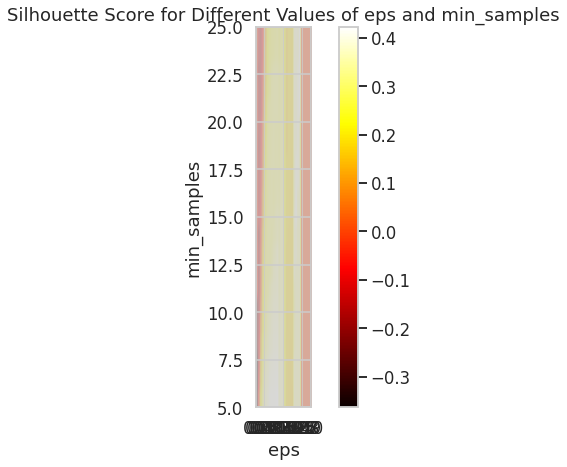


Best Silhouette Score: 0.42
Best Parameters: {'min_samples': 5, 'eps': 1.2, 'n_clusters': 52}


(0.4225606832617899, {'min_samples': 5, 'eps': 1.2, 'n_clusters': 52})

In [ ]:
DBScan(scaled_data, )

In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']
scaler = StandardScaler()

# Fit and transform the data using the scaler
scaled_data = scaler.fit_transform(iris_data.data)


For 2 clusters, the average silhouette_score is : 0.6810461692117462 , the destortion function is : 0.8555777695266533 ,and inertia is : 152.3479517603579
For 3 clusters, the average silhouette_score is : 0.5528190123564095 , the destortion function is : 0.6480304904934434 ,and inertia is : 78.851441426146
For 4 clusters, the average silhouette_score is : 0.49805050499728737 , the destortion function is : 0.5573847727333312 ,and inertia is : 57.22847321428572
For 5 clusters, the average silhouette_score is : 0.48874888709310566 , the destortion function is : 0.5096521951118286 ,and inertia is : 46.446182051282065
For 6 clusters, the average silhouette_score is : 0.36483400396700255 , the destortion function is : 0.4670733963396438 ,and inertia is : 39.03998724608726
For 7 clusters, the average silhouette_score is : 0.35387107037781307 , the destortion function is : 0.43896290286953604 ,and inertia is : 34.5730308278678
For 8 clusters, the average silhouette_score is : 0.359745492384576

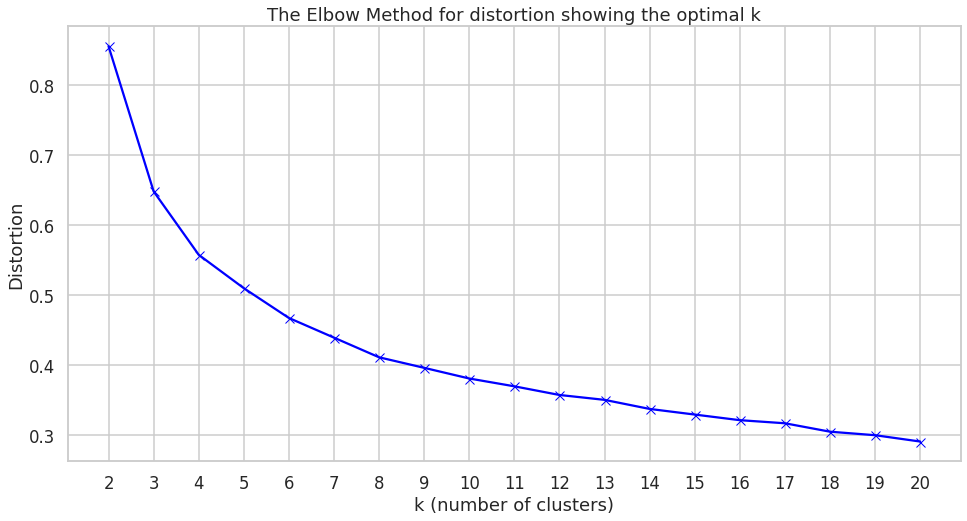

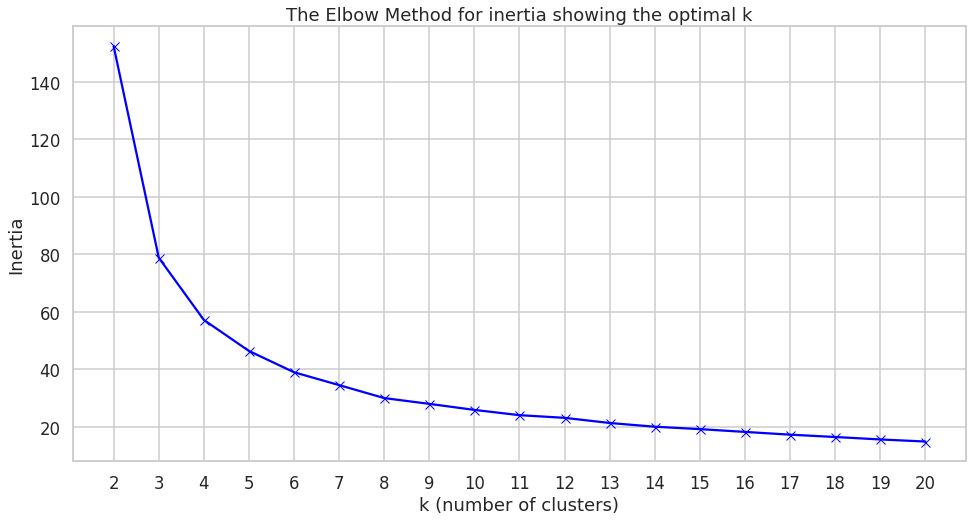

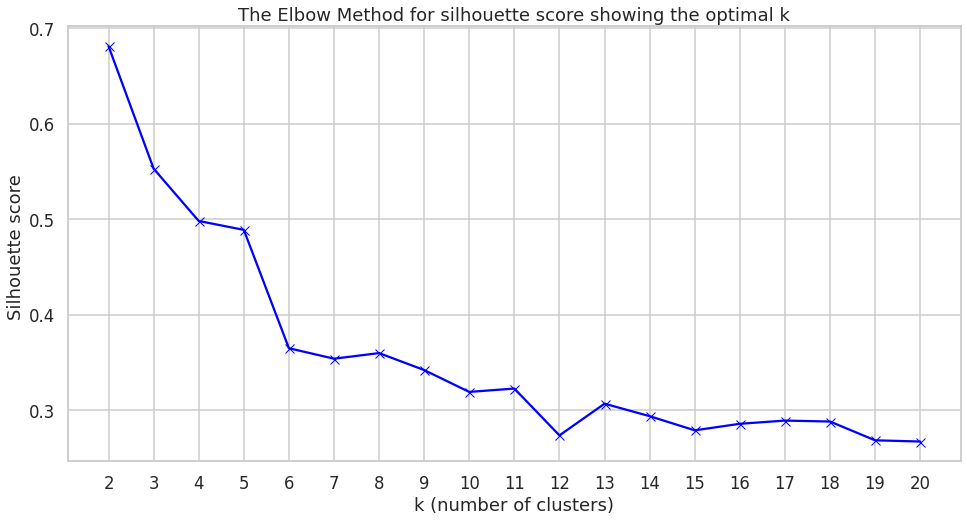

{'n_clusters': 2, 'silhouette_score': 0.6810461692117462}

In [ ]:
K_mean(iris_data.data)

In [ ]:
sns.pairplot(pd.DataFrame(iris_data.data,columns = iris_data.feature_names), kind="reg")
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
# prepare transform on dataset
pca.fit(iris_data.data)
# apply transform to dataset
transformed = pca.transform(iris_data.data)
dff = pd.DataFrame(transformed,columns = ["1",'2',"3"])
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(dff, x='1', y='2', z='3',
              color='3')
fig.show()

In [ ]:
K_mean(dff)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# prepare transform on dataset
pca.fit(iris_data.data)
# apply transform to dataset
transformed = pca.transform(iris_data.data)
# dff = pd.DataFrame(transformed,columns = ["1",'2',"3"])
# import plotly.express as px
# df = px.data.iris()
# fig = px.scatter_3d(dff, x='1', y='2', z='3',
#               color='3')
# fig.show()

In [ ]:
K_mean(transformed)

In [ ]:
K_mean(iris_data.data) # 2

In [ ]:
Agglomerative_clustering(iris_data.data, linkages = ['average', 'single', 'complete'], distance_thresholds = [0.1,0.2], no_dendograms = True)
# The number of clusters is : 2 clusters with silhouette score : 0.69
# Affinity: cosine, Linkage: complete, Distance Threshold: 0.1
# Silhouette Score: 0.69